# 16. Simulation Financial Models

In [1]:
import sys
sys.path.append(".//Valuations//")
from Valuations import *

In [2]:
snrn = sn_random_numbers((2, 2, 2), antithetic = False, moment_matching = False)
snrn

array([[[ 1.4066575 , -0.27924374],
        [ 0.07674526, -0.85462472]],

       [[ 0.30951533, -1.17536486],
        [-0.32674879,  1.20040512]]])

In [3]:
snrn_mm = sn_random_numbers((2, 3, 2), antithetic = False, moment_matching = True)
snrn_mm

array([[[ 2.11730605, -0.71268598],
        [-1.47486492,  0.25014947],
        [-0.23163592, -1.09692626]],

       [[ 1.37221612,  0.11047495],
        [ 0.29748538,  0.41558924],
        [ 0.11275507, -1.1598632 ]]])

In [4]:
print('Mean: {}'.format(snrn_mm.mean()))
print('Std: {}'.format(snrn_mm.std()))

Mean: 0.0
Std: 1.0


In [5]:
me_gbm = market_environment('me_gbm', dt.datetime(2015,1,1))
me_gbm.add_constant('initial_value', 36)
me_gbm.add_constant('volatility', 0.2)
me_gbm.add_constant('final_date', dt.datetime(2015, 12, 31))
me_gbm.add_constant('currency', 'EUR')
me_gbm.add_constant('frequency','M')
me_gbm.add_constant('paths', 10000)

In [6]:
csr = constant_short_rate('csr',0.05)

In [7]:
me_gbm.add_curve('discount_curve', csr)

In [8]:
from Valuations import geometric_brownian_motion, simulation_class
gbm = geometric_brownian_motion('gbm', me_gbm)

In [9]:
gbm.generate_time_grid()

In [10]:
gbm.time_grid

array([datetime.datetime(2015, 1, 1, 0, 0),
       datetime.datetime(2015, 1, 31, 0, 0),
       datetime.datetime(2015, 2, 28, 0, 0),
       datetime.datetime(2015, 3, 31, 0, 0),
       datetime.datetime(2015, 4, 30, 0, 0),
       datetime.datetime(2015, 5, 31, 0, 0),
       datetime.datetime(2015, 6, 30, 0, 0),
       datetime.datetime(2015, 7, 31, 0, 0),
       datetime.datetime(2015, 8, 31, 0, 0),
       datetime.datetime(2015, 9, 30, 0, 0),
       datetime.datetime(2015, 10, 31, 0, 0),
       datetime.datetime(2015, 11, 30, 0, 0),
       datetime.datetime(2015, 12, 31, 0, 0)], dtype=object)

In [11]:
%time paths_1 = gbm.get_instrument_values()

Wall time: 11 ms


.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


In [12]:
paths_1

array([[ 36.        ,  36.        ,  36.        , ...,  36.        ,
         36.        ,  36.        ],
       [ 37.42754613,  38.14530219,  34.42245446, ...,  36.2762184 ,
         35.10693585,  39.69412227],
       [ 39.57168561,  42.30901271,  32.47856479, ...,  34.90288869,
         33.70226938,  37.73511731],
       ..., 
       [ 40.76172675,  33.66633559,  23.67671957, ...,  38.12747683,
         30.34285148,  30.67519826],
       [ 42.79443821,  37.19590313,  22.06713919, ...,  36.3007652 ,
         31.15414138,  30.96333816],
       [ 44.11655725,  38.10789501,  24.31662334, ...,  36.57696926,
         28.38213513,  29.29542681]])

In [13]:
gbm.update(volatility=0.5)

In [14]:
%time paths_2 = gbm.get_instrument_values()

Wall time: 9.53 ms


.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


## Plot Paths
Plot paths for each of the two volatility values used.

(array([ 735599.,  735658.,  735719.,  735780.,  735842.,  735903.,  735964.]),
 <a list of 7 Text xticklabel objects>)

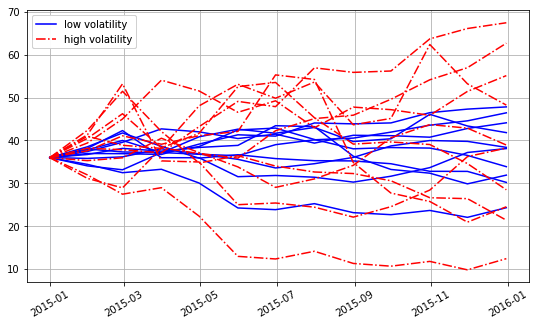

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize = (9,5))
p1 = plt.plot(gbm.time_grid, paths_1[:, :10],'b')
p2 = plt.plot(gbm.time_grid, paths_2[:, :10],'r-.')
plt.grid(True)
l1 = plt.legend([p1[0], p2[0]], 
               ['low volatility', 'high volatility'], loc=2)
plt.gca().add_artist(l1)
plt.xticks(rotation=30)

## Jump Diffusion

In [16]:
me_jd = market_environment('me_jd', dt.datetime(2015, 1, 1))

#add jump diffusion parameters
me_jd.add_constant('lambda', 0.3)
me_jd.add_constant('mu', -0.75)
me_jd.add_constant('delta', 0.1)

In [17]:
me_jd.add_environment(me_gbm)

In [18]:
jd = jump_diffusion('jd', me_jd)

In [19]:
%time paths_3 = jd.get_instrument_values()

Wall time: 25.1 ms


.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


In [20]:
jd.update(lamb=0.9)

In [21]:
%time paths_4 = jd.get_instrument_values()

Wall time: 25.1 ms


.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


(array([ 735599.,  735658.,  735719.,  735780.,  735842.,  735903.,  735964.]),
 <a list of 7 Text xticklabel objects>)

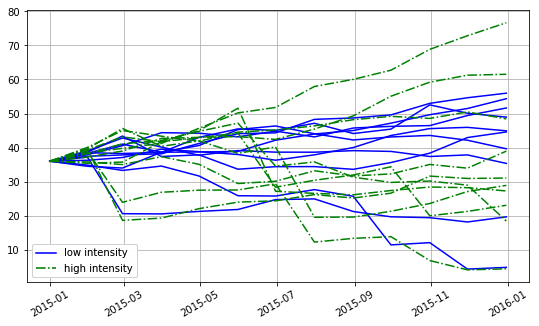

In [22]:
plt.figure(figsize=(9,5))
p1 = plt.plot(gbm.time_grid, paths_3[:, :10], 'b')
p2 = plt.plot(gbm.time_grid, paths_4[:, :10], 'g-.')
plt.grid(True)
l1 = plt.legend([p1[0], p2[0]], ['low intensity', 'high intensity'], loc=3)
plt.gca().add_artist(l1)
plt.xticks(rotation=30)

## Square Root Diffusion

In [23]:
me_srd = market_environment('me_srd', dt.datetime(2015,1,1))
me_srd.add_constant('initial_value', 0.25)
me_srd.add_constant('volatility', 0.05)
me_srd.add_constant('final_date', dt.datetime(2015, 12, 31))
me_srd.add_constant('currency', 'EUR')
me_srd.add_constant('frequency', 'W')
me_srd.add_constant('paths', 10000)

#Constants specific to the Square Root Diffusion
me_srd.add_constant('kappa', 4.0)
me_srd.add_constant('theta', 0.2)

In [24]:
me_srd.add_curve('discount_curve', constant_short_rate('r', 0.0))

In [25]:
from square_root_diffusion import square_root_diffusion
srd = square_root_diffusion('srd', me_srd)
srd_paths = srd.get_instrument_values()[:, :10]

.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


(array([ 735599.,  735658.,  735719.,  735780.,  735842.,  735903.,  735964.]),
 <a list of 7 Text xticklabel objects>)

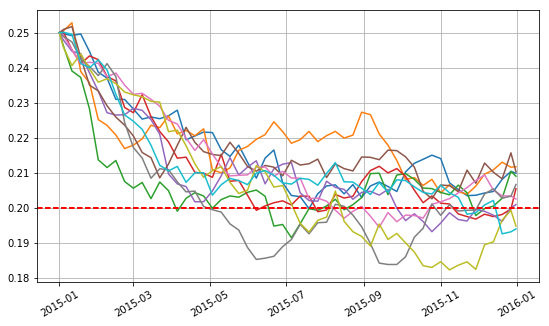

In [26]:
plt.figure(figsize=(9,5))
p1 = plt.plot(srd.time_grid, srd_paths)
plt.axhline(me_srd.get_constant('theta'), color='r', ls='--', lw=2.0)
plt.grid(True)
plt.xticks(rotation=30)